In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

#bd = base de datos
bd = pd.read_excel("/content/drive/MyDrive/Base de datos/public_emdat_custom_request_2024-11-04_131af490-d94d-4f2f-9bd2-c5bdbd081380.xlsx")

bd.head()


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
8405,2024-9197-ZWE,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000066|GLIDE:DR-2024-000069,NaN,ZWE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-05,2024-08-12
8406,2024-9277-VNM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,VNM,...,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN,2024-05-03,2024-08-12
8407,2024-9338-NAM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000094,NaN,NAM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-07,2024-09-30
8408,2024-9381-GRD,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000079,NaN,GRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-14,2024-08-12
8409,2024-9592-AGO,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000095,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-12,2024-08-12


In [6]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410 entries, 0 to 8409
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     8410 non-null   object 
 1   Historic                                   8410 non-null   object 
 2   Classification Key                         8410 non-null   object 
 3   Disaster Group                             8410 non-null   object 
 4   Disaster Subgroup                          8410 non-null   object 
 5   Disaster Type                              8410 non-null   object 
 6   Disaster Subtype                           8410 non-null   object 
 7   External IDs                               1764 non-null   object 
 8   Event Name                                 2558 non-null   object 
 9   ISO                                        8410 non-null   object 
 10  Country                 

# **Condiciones y filtrado de los datos:**

In [11]:
desastre = bd[bd["Disaster Type"] == "Flood"]


In [12]:
desastre = desastre[(desastre["Start Year"] >= 2010) & (desastre["Start Year"] <= 2012)]


In [16]:
columnas_relevantes = [
    'DisNo.', 'Event Name', 'Disaster Type', 'Disaster Subtype',
    'Disaster Group', 'Start Year', 'Start Month', 'Start Day',
    'End Year', 'End Month', 'End Day', 'Country', 'Region',
    'Location', 'Latitude', 'Longitude', 'Total Deaths',
    'No. Injured', 'No. Affected', 'No. Homeless',
    'Total Affected', 'Total Damage (\'000 US$)',
    'Reconstruction Costs (\'000 US$)', 'Insured Damage (\'000 US$)',
    'CPI', 'Admin Units', 'Appeal'
]

desastre = desastre[columnas_relevantes]

desastre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 6 to 1796
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DisNo.                           473 non-null    object 
 1   Event Name                       1 non-null      object 
 2   Disaster Type                    473 non-null    object 
 3   Disaster Subtype                 473 non-null    object 
 4   Disaster Group                   473 non-null    object 
 5   Start Year                       473 non-null    int64  
 6   Start Month                      473 non-null    float64
 7   Start Day                        429 non-null    float64
 8   End Year                         473 non-null    int64  
 9   End Month                        473 non-null    float64
 10  End Day                          424 non-null    float64
 11  Country                          473 non-null    object 
 12  Region                    

# Totalización y Eliminado de valores nulos (Limpieza de datos)

In [32]:
print(desastre.isnull().sum())

# Opcional: Eliminar filas con valores nulos en columnas críticas
df_completo = desastre.dropna(subset=['Total Deaths', 'Total Affected', 'Total Damage (\'000 US$)'])   #estas son las columnas criticas que pueden alterar en caso de nulidad
                                                                                                       #el analisis
#por lo que contiene solo las filas donde no hay valores nulos en las columnas críticas, lo que permite realizar un análisis más confiable.



DisNo.                               0
Event Name                         472
Disaster Type                        0
Disaster Subtype                     0
Disaster Group                       0
Start Year                           0
Start Month                          0
Start Day                           44
End Year                             0
End Month                            0
End Day                             49
Country                              0
Region                               0
Location                             0
Latitude                           289
Longitude                          289
Total Deaths                       121
No. Injured                        388
No. Affected                        92
No. Homeless                       420
Total Affected                      50
Total Damage ('000 US$)            329
Reconstruction Costs ('000 US$)    472
Insured Damage ('000 US$)          444
CPI                                  0
Admin Units              

# **Analisis o descripción:**

In [23]:

# cantidad de desastres de tipo inundación por año
desastres_por_año = desastre['Start Year'].value_counts().sort_index()
print(desastres_por_año)

Start Year
2010    184
2011    153
2012    136
Name: count, dtype: int64


In [33]:
print(df_completo.describe())   #la parte estadistica

        Start Year  Start Month   Start Day    End Year   End Month  \
count   119.000000   119.000000  113.000000   119.00000  119.000000   
mean   2011.084034     6.764706   14.946903  2011.12605    6.983193   
std       0.829333     3.063470    8.623929     0.81879    3.180937   
min    2010.000000     1.000000    1.000000  2010.00000    1.000000   
25%    2010.000000     5.000000    9.000000  2010.00000    5.000000   
50%    2011.000000     7.000000   15.000000  2011.00000    7.000000   
75%    2012.000000     9.000000   22.000000  2012.00000   10.000000   
max    2012.000000    12.000000   31.000000  2012.00000   12.000000   

          End Day   Latitude   Longitude  Total Deaths  No. Injured  \
count  113.000000  66.000000   66.000000    119.000000    39.000000   
mean    16.610619  16.542654   54.790818    109.957983   475.025641   
std      8.806890  21.109980   70.409324    268.888213   997.802572   
min      1.000000 -32.930000  -99.000000      1.000000     1.000000   
25%  

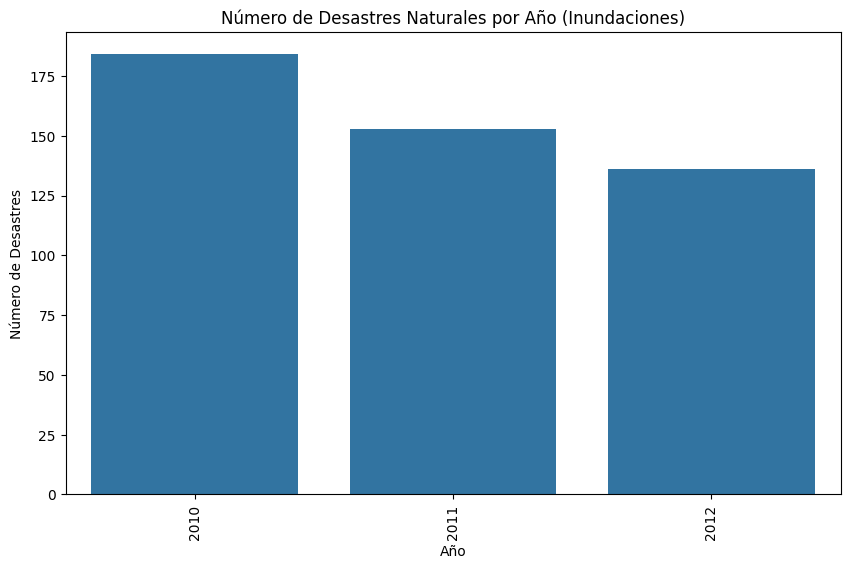

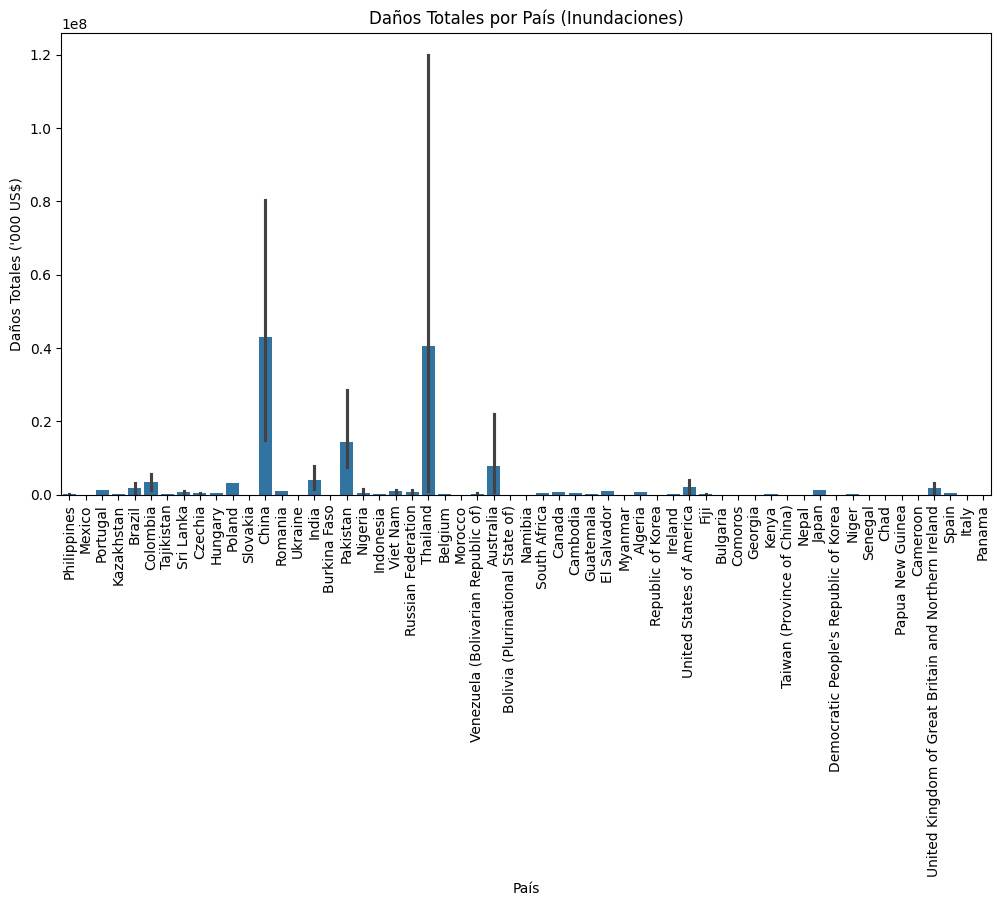

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de total de muertes por año
plt.figure(figsize=(10, 6))
sns.barplot(x=desastres_por_año.index, y=desastres_por_año.values)
plt.title('Número de Desastres Naturales por Año (Inundaciones)')
plt.xlabel('Año')
plt.ylabel('Número de Desastres')
plt.xticks(rotation=90)
plt.show()

# Gráfico de daños totales por país
plt.figure(figsize=(12, 6))
sns.barplot(data=df_completo, x='Country', y='Total Damage (\'000 US$)', estimator=sum)
plt.title('Daños Totales por País (Inundaciones)')
plt.xlabel('País')
plt.ylabel('Daños Totales (\'000 US$)')
plt.xticks(rotation=90)
plt.show()